Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns  # We'll use this to load the Titanic dataset
import matplotlib.pyplot as plt  # Required for Pandas plotting

Load the Titanic Dataset

In [5]:
df = sns.load_dataset('titanic')
print("Data Loaded Successfully")
df.head()

Data Loaded Successfully


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Check Basic Information

In [7]:
print("Shape:", df.shape)  # Rows and columns
print("Columns:", df.columns.tolist())  # All column names
print("Data Types:\n", df.dtypes)  # Data type of each column
df.describe(include='all')  # Summary for both numbers and text

Shape: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check and Fix Missing Values

In [9]:
print("Missing values:\n", df.isnull().sum())

# Fill missing 'age' with the average age using NumPy
mean_age = np.nanmean(df['age'])
df['age'].fillna(mean_age, inplace=True)

# Fill missing 'embarked' with the most frequent value
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop the 'deck' column (too many missing values)
df.drop(columns='deck', inplace=True)

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Use NumPy for Statistics

In [11]:
ages = df['age'].values  # Convert the column to a NumPy array
print("Mean Age:", np.mean(ages))
print("Median Age:", np.median(ages))
print("Standard Deviation:", np.std(ages))
print("Min Age:", np.min(ages))
print("Max Age:", np.max(ages))
print("Index of Max Age:", np.argmax(ages))
print("Index of Max Age:", np.argmin(ages))

Mean Age: 29.69911764705882
Median Age: 29.69911764705882
Standard Deviation: 12.99471687278903
Min Age: 0.42
Max Age: 80.0
Index of Max Age: 630
Index of Max Age: 803


 Select and View Data

In [13]:
print(df[['sex', 'age']].head())

      sex   age
0    male  22.0
1  female  38.0
2  female  26.0
3  female  35.0
4    male  35.0


Filter Data (Only Adults)

In [15]:
adults = df[df['age'] >= 18]
print("Number of adults:", len(adults))

Number of adults: 778


Group and Aggregate Data

In [17]:
grouped = df.groupby('sex')['age'].agg(['count', 'mean', 'min', 'max'])
print(grouped)

        count       mean   min   max
sex                                 
female    314  28.216730  0.75  63.0
male      577  30.505824  0.42  80.0


Sort by Fare

In [19]:
df.sort_values(by='fare', ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False


Plotting with Pandas

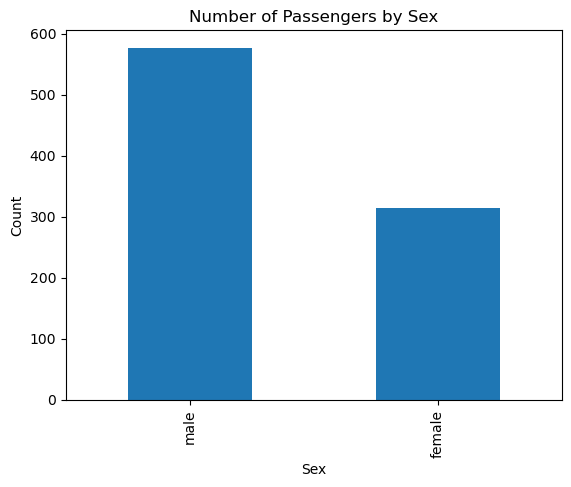

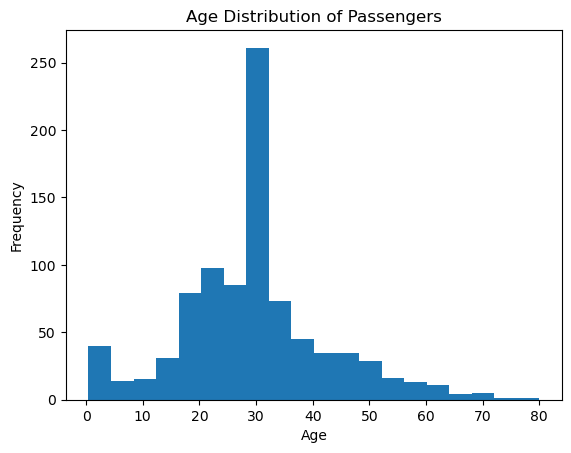

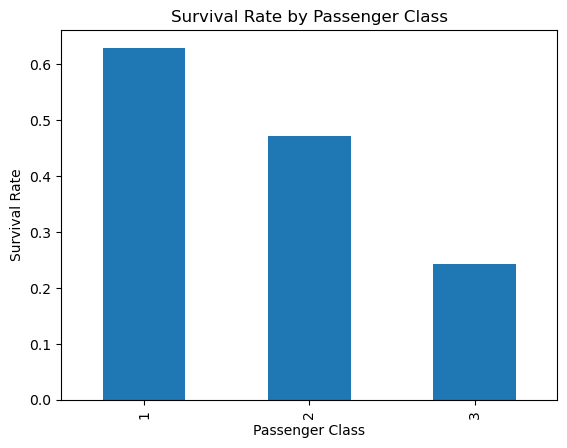

In [21]:
import matplotlib.pyplot as plt  # Required for Pandas plotting

# Plot: Number of survivors by sex (bar chart)
df['sex'].value_counts().plot(kind='bar', title='Number of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot: Age distribution (histogram)
df['age'].plot(kind='hist', bins=20, title='Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

# Plot: Survival rate by class
df.groupby('pclass')['survived'].mean().plot(kind='bar', title='Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

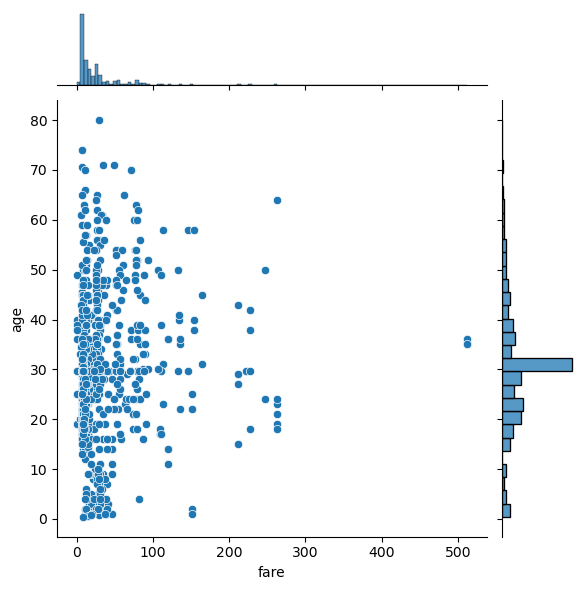

In [28]:
sns.jointplot(x='fare',y='age',data=df)

<Axes: xlabel='fare', ylabel='Count'>

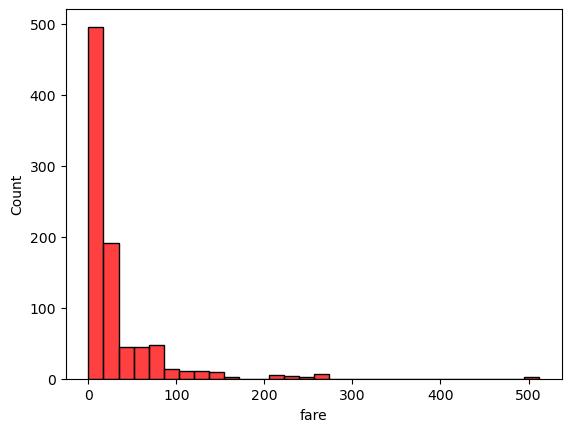

In [36]:
sns.histplot(df['fare'],bins=30,kde=False,color='red')

<Axes: xlabel='class', ylabel='age'>

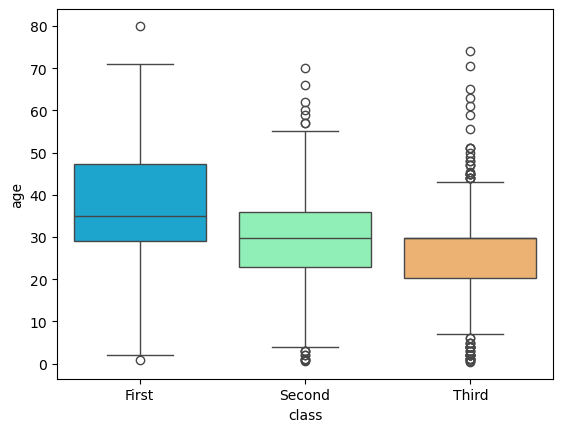

In [62]:
sns.boxplot(x='class', y='age', data=df, hue='class', palette='rainbow', dodge=False)

<Axes: xlabel='class', ylabel='age'>

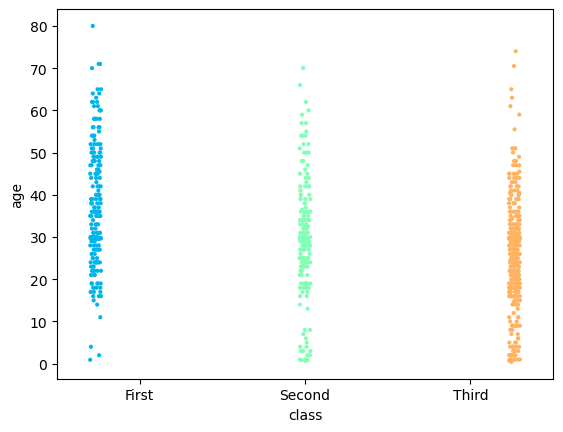

In [60]:
sns.stripplot(x='class', y='age', data=df, hue='class', palette='rainbow', dodge=True, size=3)

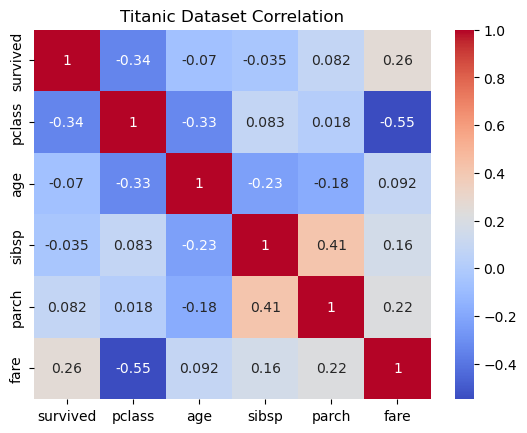

In [66]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)  # optional: annot=True to show numbers inside boxes
plt.title('Titanic Dataset Correlation')
plt.show()

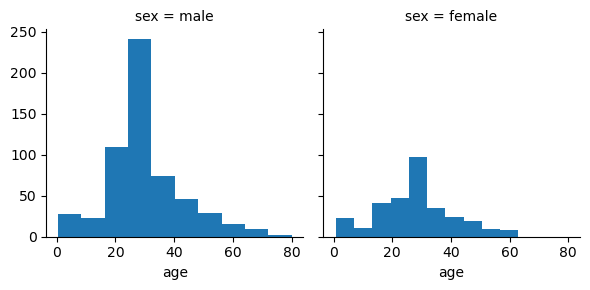

In [70]:
g = sns.FacetGrid(data=df,col='sex')
g.map(plt.hist,'age')